In [1]:
##################### Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
#import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
from PIL import Image
warnings.filterwarnings('ignore')
from scipy.stats import chi2
import os
# os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width: 60% !important; }</style>"))
# plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle
plt.style.use(['dark_background'])
from google.colab import drive
drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/My Drive/Data/chapter28_df.csv")

plt.rcParams['font.family'] = 'DejaVu Sans'
import warnings
warnings.filterwarnings("ignore", message="findfont: Font family")




Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/My Drive/Data/bank-additional-full.csv", sep=';')


In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


df.shape

In [4]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df_original =df.copy()

In [7]:
df_original

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df = df.drop_duplicates(keep='first')

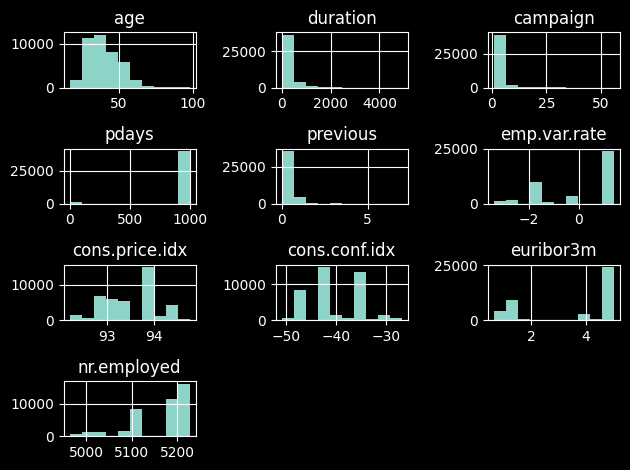

In [10]:
df.hist()

plt.tight_layout()

In [11]:
df['age'].value_counts().sort_values(ascending=False)

,count
age,
31,1947
32,1845
33,1833
36,1779
35,1758
...,...
89,2
91,2
94,1


age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64


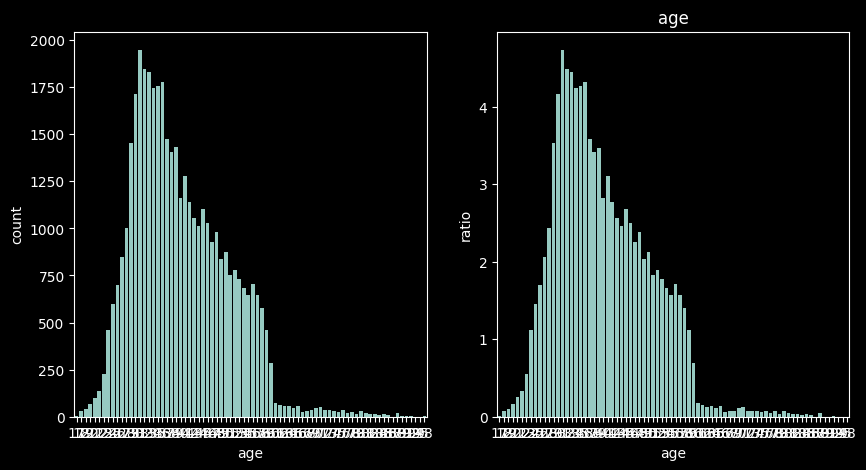

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


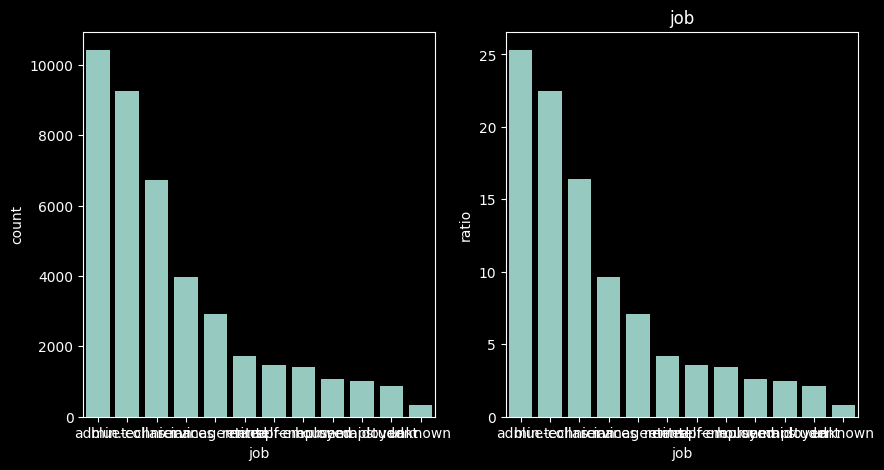

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64


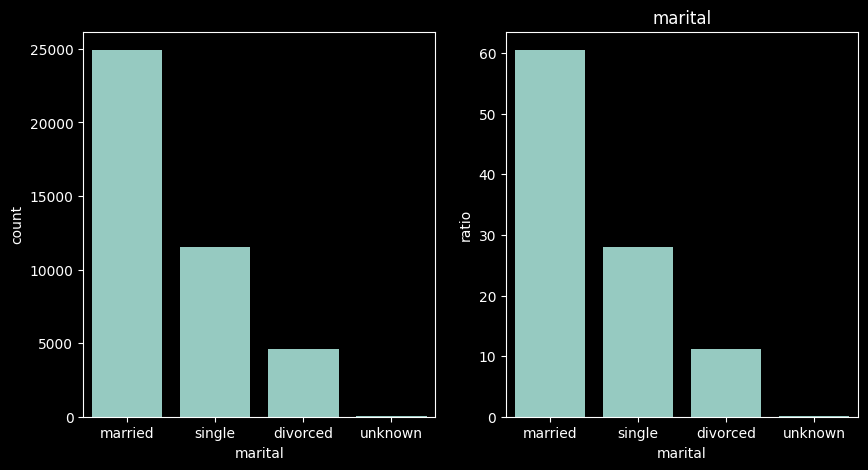

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


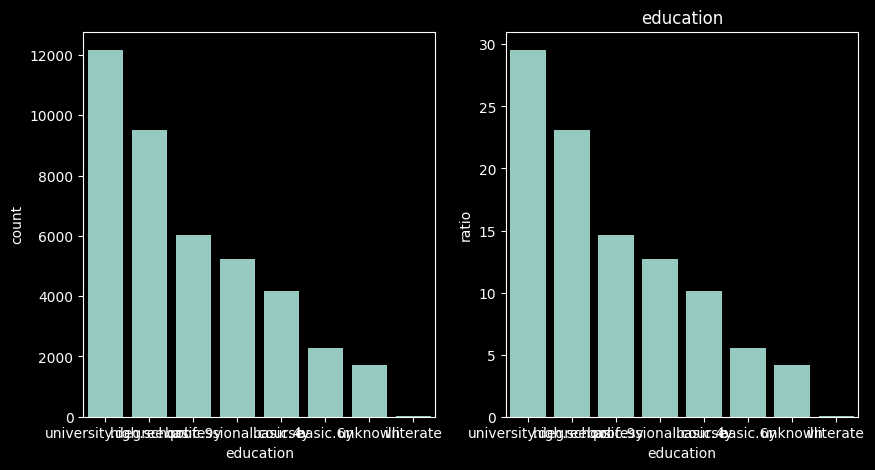

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


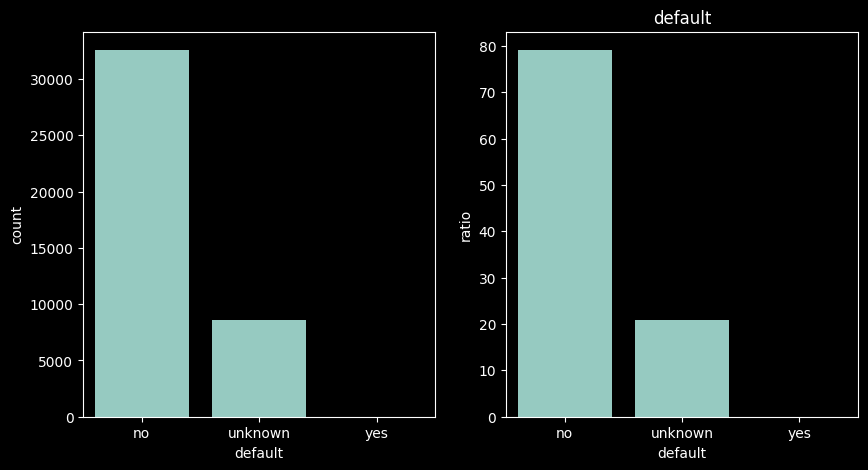

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64


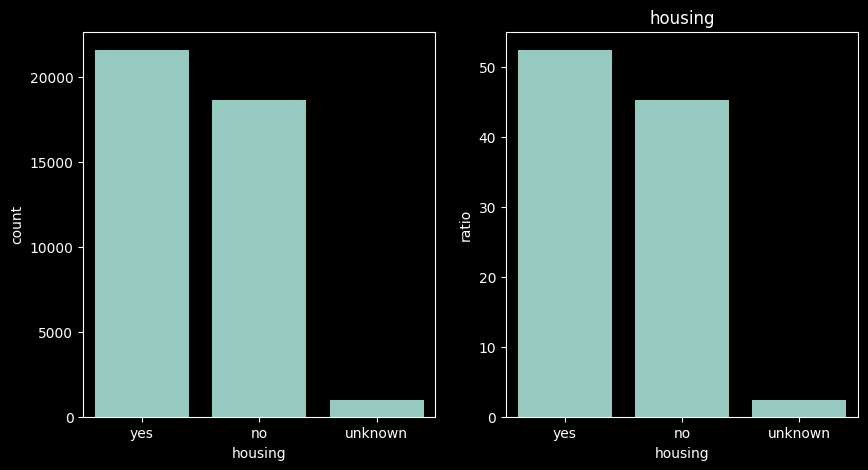

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64


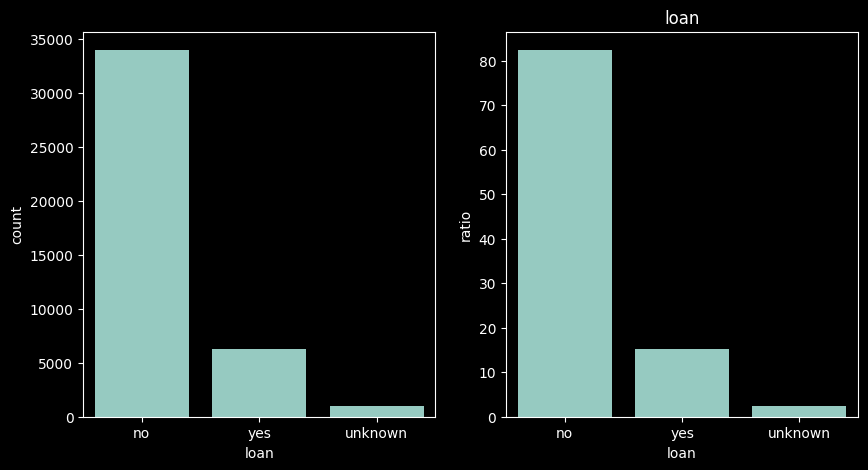

contact
cellular     26135
telephone    15041
Name: count, dtype: int64


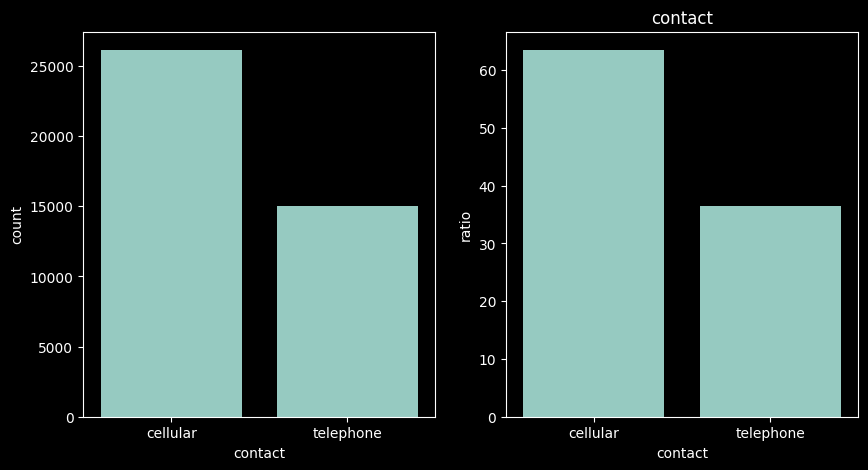

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64


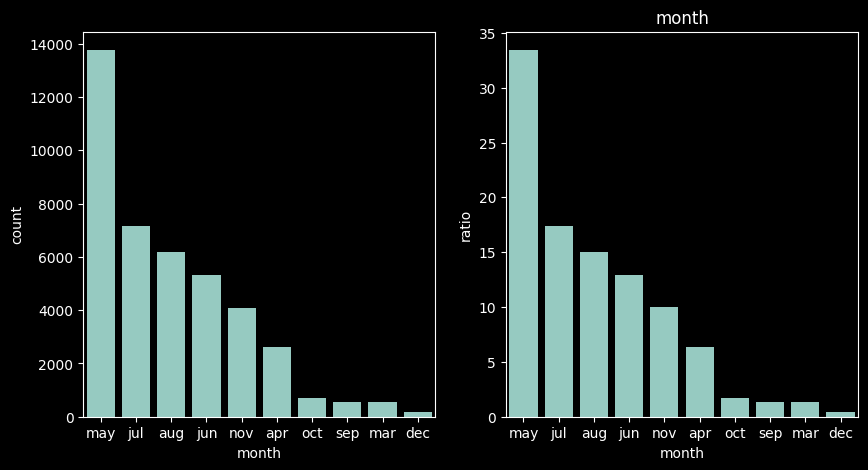

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64


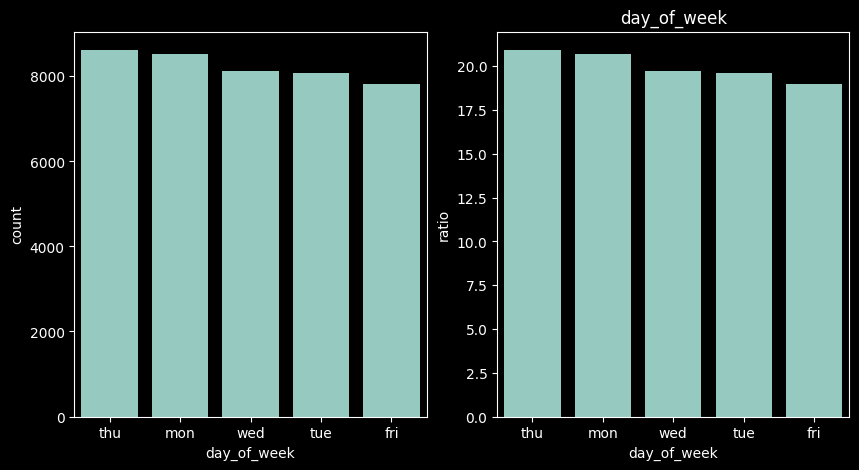

duration
90      170
85      170
136     168
73      167
124     163
       ... 
1233      1
2184      1
1628      1
1804      1
1868      1
Name: count, Length: 1544, dtype: int64


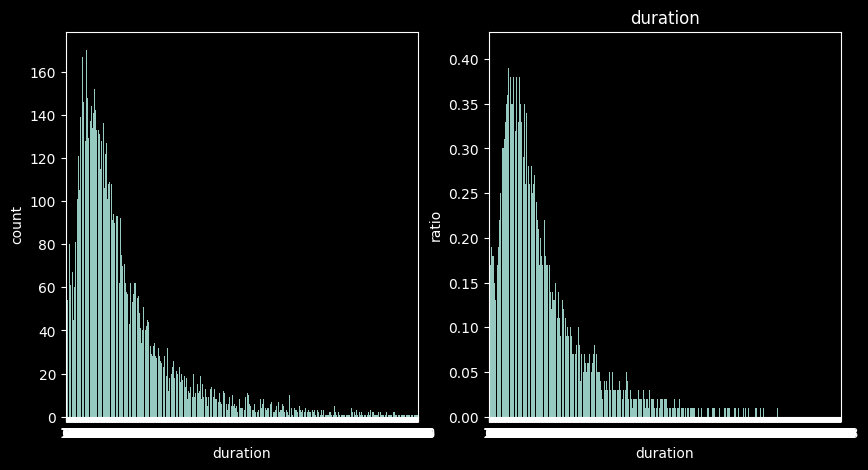

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
33        4
32        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64


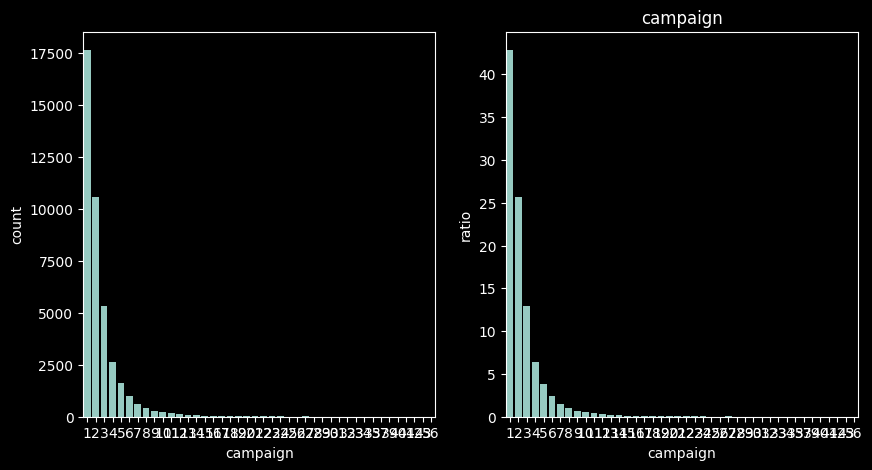

pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64


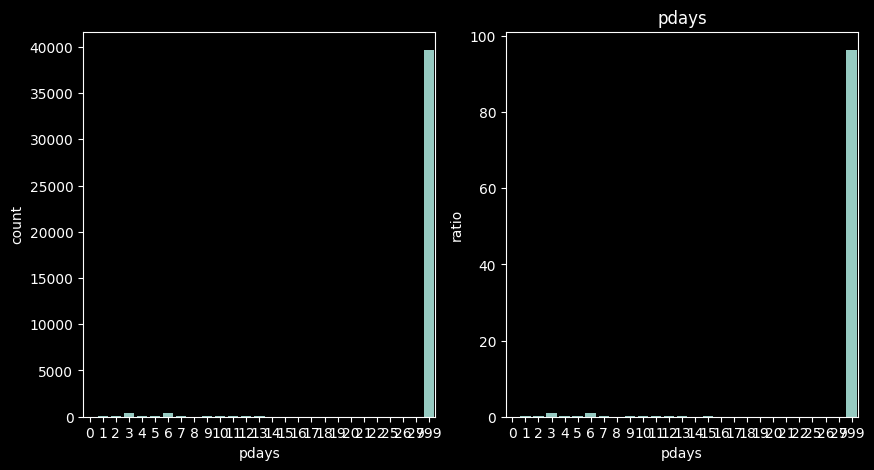

previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64


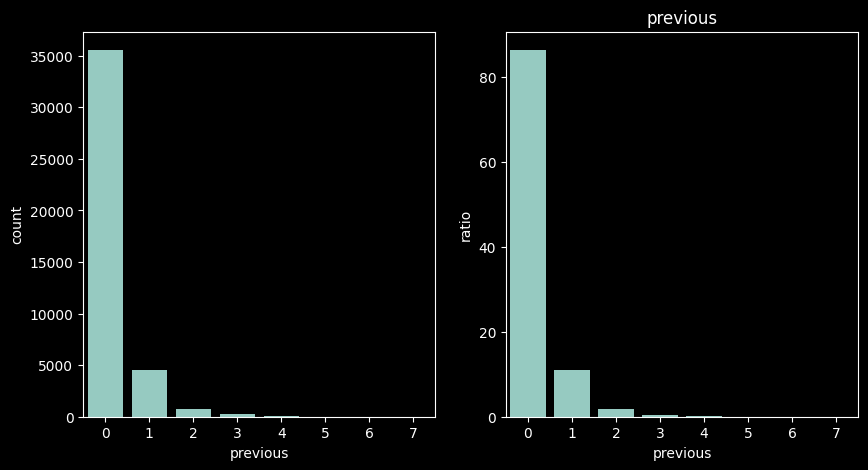

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64


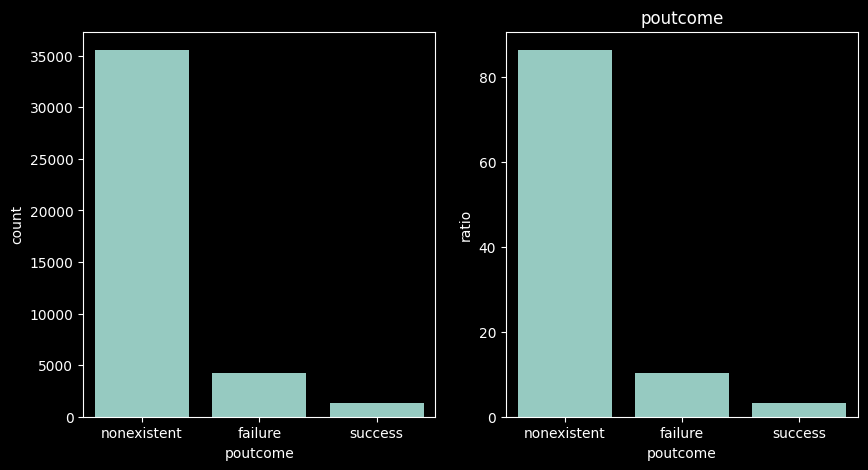

emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64


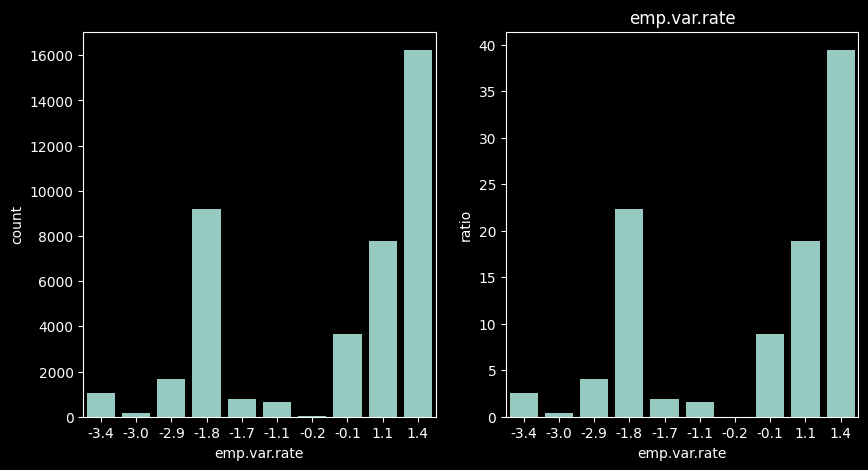

cons.price.idx
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64


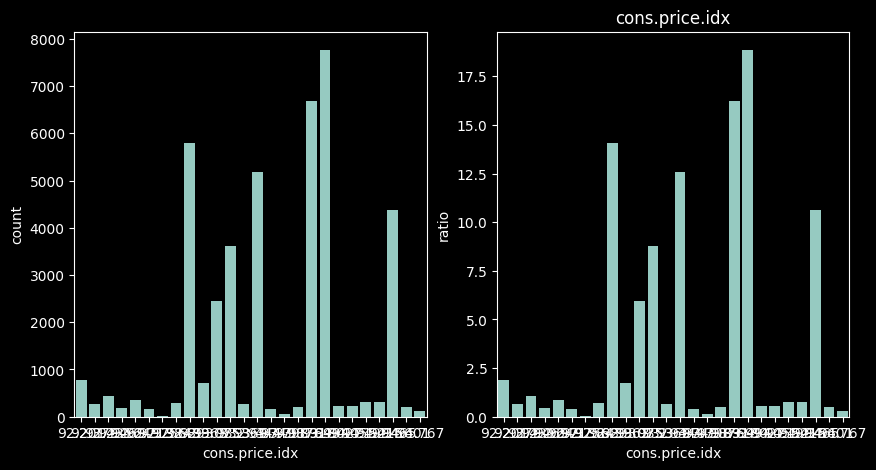

cons.conf.idx
-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: count, dtype: int64


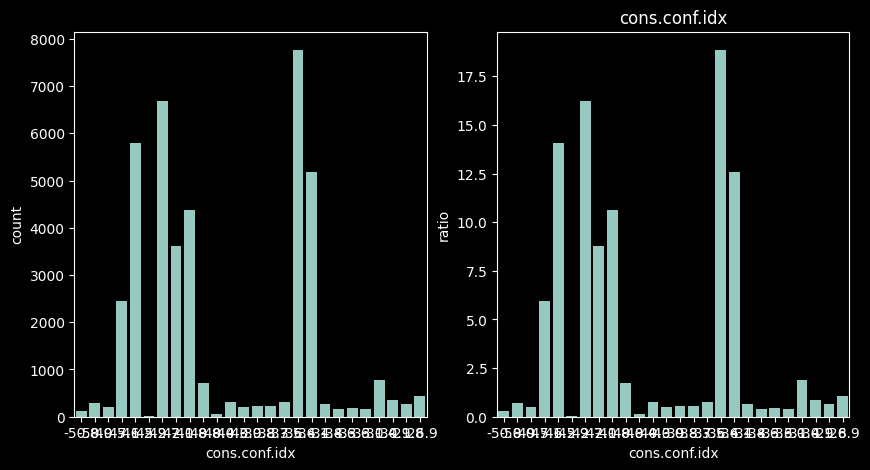

euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
1.574       1
3.488       1
3.282       1
3.329       1
3.669       1
Name: count, Length: 316, dtype: int64


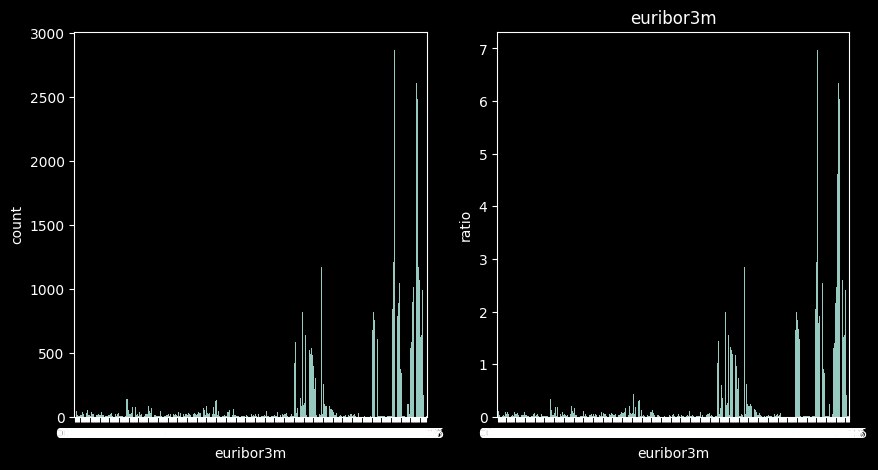

nr.employed
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64


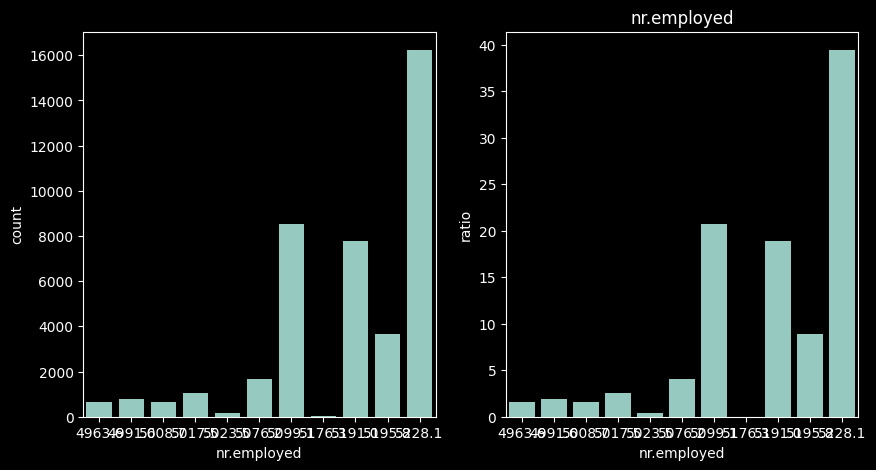

y
no     36537
yes     4639
Name: count, dtype: int64


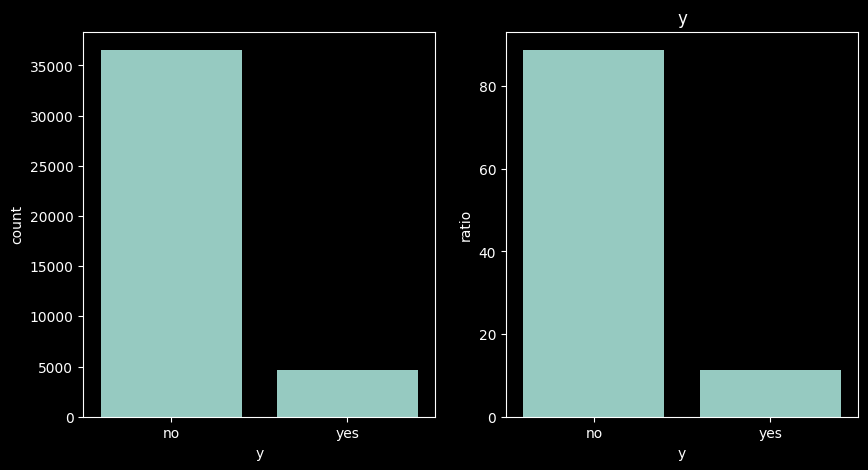

In [12]:
for i in df.columns:
  print('=================================================')
  print(df[i].value_counts().sort_values(ascending=False))
  df_check = df[i].value_counts().sort_values(ascending=False).reset_index()
  df_check['ratio'] = np.round((df_check['count'] / df_check['count'].sum())*100,2)
  figs, axes  = plt.subplots(1,2,figsize= (10,5))

  sns.barplot(data=df_check, x=df_check[i], y=df_check['count'], ax = axes[0])
  sns.barplot(data=df_check, x=df_check[i], y=df_check['ratio'], ax = axes[1])
  plt.title(i)
  plt.show()

# Categorical and Numerical

In [13]:
df = df_original.copy()

In [14]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [15]:
df['y'] = np.where(df['y'] == 'yes', 1, 0)

In [16]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [17]:
categorical_list = []
numerical_list = []


for i in df.columns:
  if df[i].dtypes == 'O':
    categorical_list.append(i)
  else:
    numerical_list.append(i)




In [18]:
df_categorical = df[categorical_list]

In [19]:
df_numerical = df[numerical_list]

In [20]:
df_categorical['y'] = df['y']

In [21]:
df_numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [22]:
df_check = pd.DataFrame(df_numerical.groupby('y')['age'].mean())
df_check

,age
y,
0,39.911185
1,40.913147


age
         age
y           
0  39.911185
1  40.913147


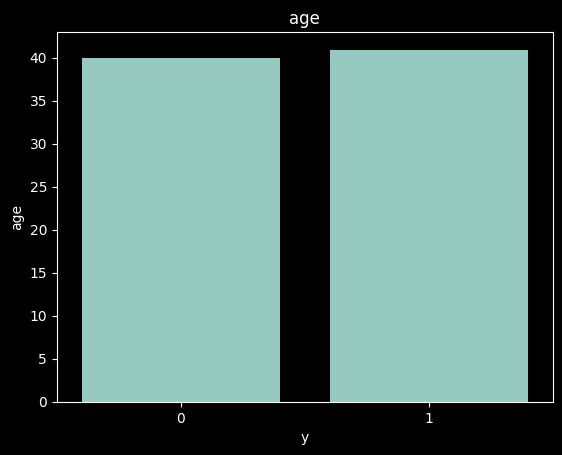

duration
     duration
y            
0  220.844807
1  553.191164


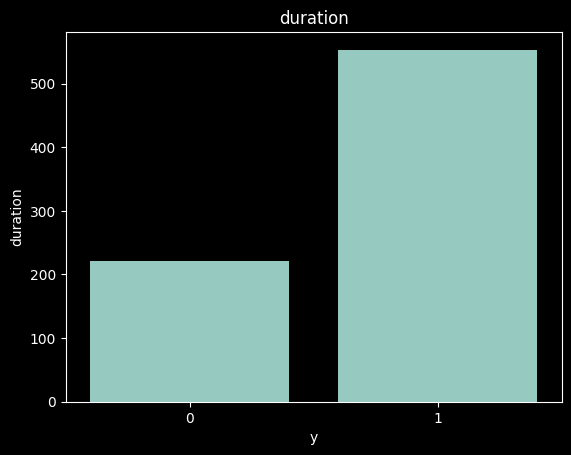

campaign
   campaign
y          
0  2.633085
1  2.051724


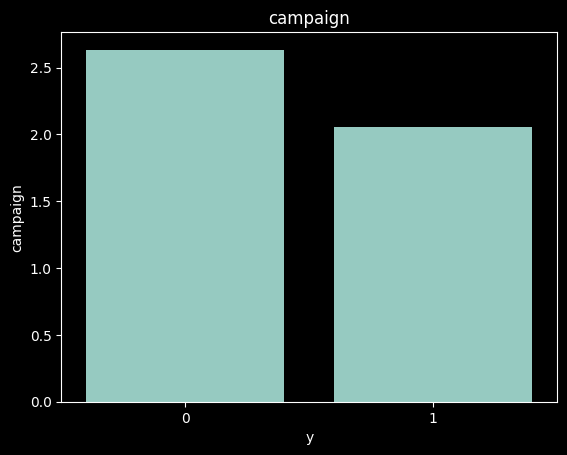

pdays
        pdays
y            
0  984.113878
1  792.035560


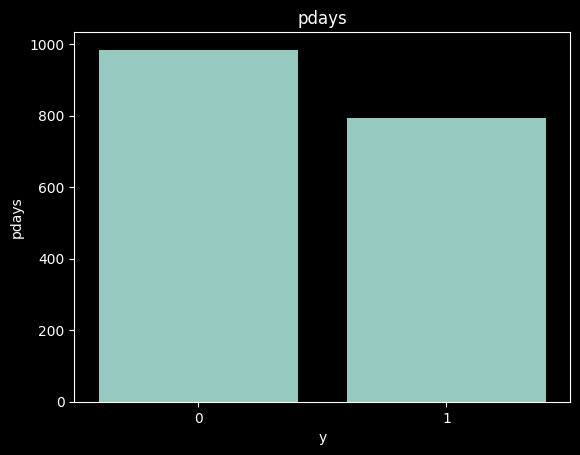

previous
   previous
y          
0  0.132374
1  0.492672


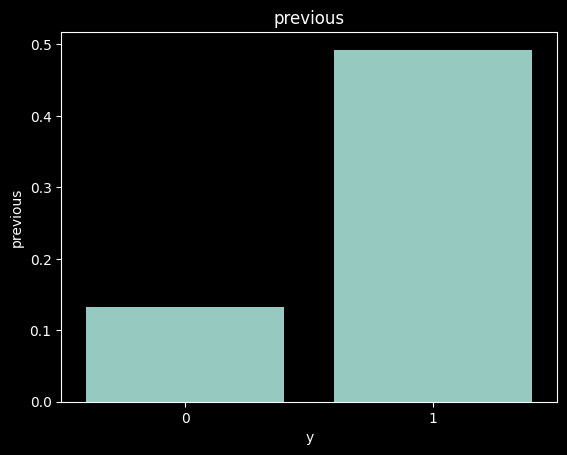

emp.var.rate
   emp.var.rate
y              
0      0.248875
1     -1.233448


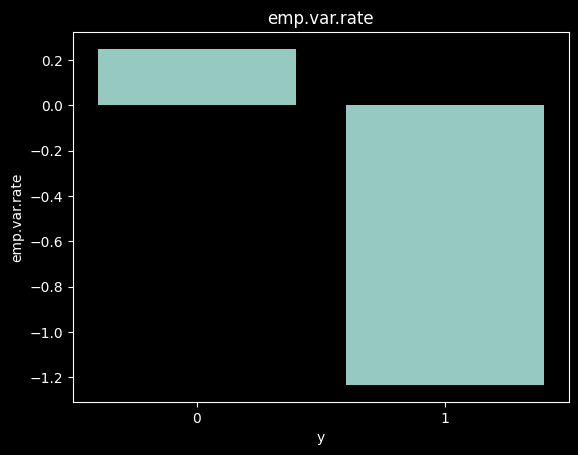

cons.price.idx
   cons.price.idx
y                
0       93.603757
1       93.354386


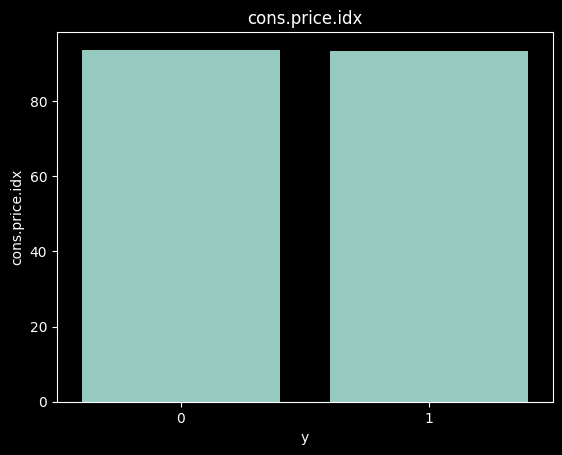

cons.conf.idx
   cons.conf.idx
y               
0     -40.593097
1     -39.789784


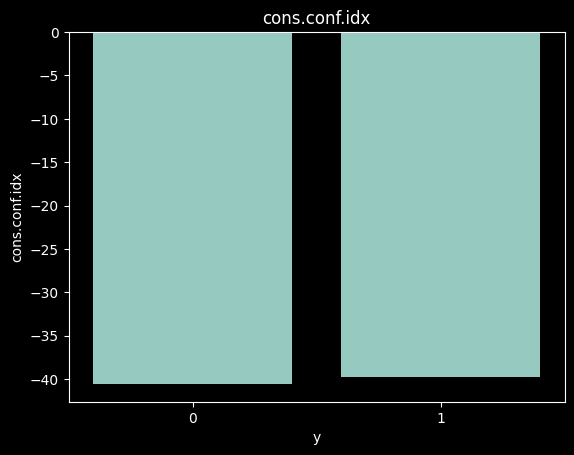

euribor3m
   euribor3m
y           
0   3.811491
1   2.123135


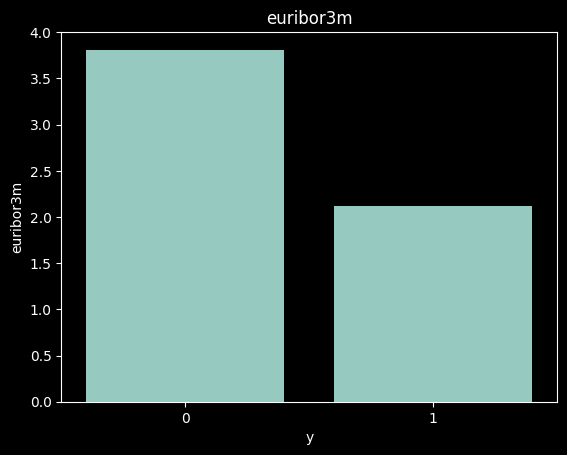

nr.employed
   nr.employed
y             
0  5176.166600
1  5095.115991


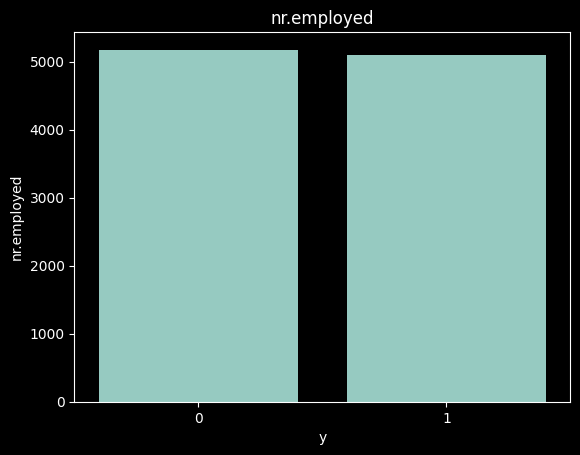

y
     y
y     
0  0.0
1  1.0


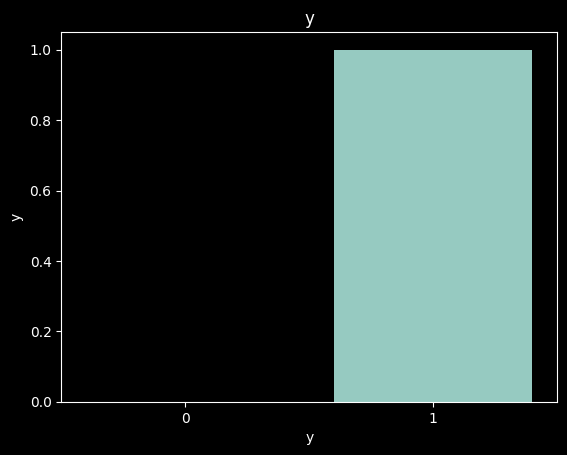

In [23]:
for i in df_numerical.columns:
  print('==============================================')
  # print(df_numerical.groupby('y')[i].agg(['sum', 'count']))
  print(i)
  df_check = pd.DataFrame(df_numerical.groupby('y')[i].mean())
  # df_check['ratio'] = np.round((df_check['count'] / df_check['sum'])*100,2)
  print(df_check)

  sns.barplot(data=df_check, x= df_check.index, y=df_check[i])

  plt.title(i)
  plt.show()

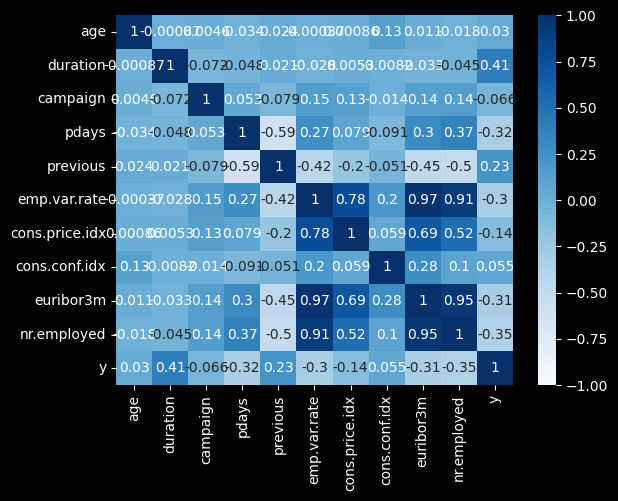

In [24]:
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues', vmax=1, vmin=-1)

plt.show()

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [27]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [28]:
4640/(4640+36548)

0.11265417111780131

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


# Modeling

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [31]:
ohe = OneHotEncoder()

In [32]:
X = df.drop('y', axis=1)
Y = df['y']

In [33]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [34]:
categorical_list = []
numerical_list = []

for i in X.columns:
  if X[i].dtypes == 'O':
    categorical_list.append(i)


In [35]:
categorical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [36]:
X['job']

,job
0,housemaid
1,services
2,services
3,admin.
4,services
...,...
41183,retired
41184,blue-collar
41185,retired
41186,technician


In [37]:
ohe.fit_transform(X[['job']])

<41188x12 sparse matrix of type '<class 'numpy.float64'>'
	with 41188 stored elements in Compressed Sparse Row format>

In [38]:
X_ohe = X.copy()
for i in categorical_list:
  ohe_df = pd.DataFrame(ohe.fit_transform(X[[i]]).toarray(),
                        columns = ohe.get_feature_names_out([i]))
  X_ohe.drop(i, axis=1, inplace=True)
  X_ohe = pd.concat([X_ohe, ohe_df], axis=1)


In [39]:
pd.concat([X_ohe, Y], axis=1).corr()['y'].sort_values()

,y
nr.employed,-0.354678
pdays,-0.324914
euribor3m,-0.307771
emp.var.rate,-0.298334
poutcome_nonexistent,-0.193507
...,...
contact_cellular,0.144773
previous,0.230181
poutcome_success,0.316269
duration,0.405274


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
smote= SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X_ohe, Y)

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix, roc_curve, roc_auc_score

import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf

In [43]:
X_res_scaler = pd.DataFrame(StandardScaler().fit_transform(X_res), columns = X_res.columns)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_res_scaler, y_res, test_size=0.3, random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(51167, 63)
(21929, 63)
(51167,)
(21929,)


In [46]:
knn_c = KNeighborsClassifier()
knn_c.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# rfc = RandomForestClassifier()


# rfc.fit(x_train, y_train)


# y_pred_train = rfc.predict(x_train)
# y_pred_test = rfc.predict(x_test)

# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# print('cross_val')
# cross_val = cross_val_score(rfc, x_train, y_train, cv=kfold, scoring='accuracy')
# print(cross_val)
# print(cross_val.mean())


# print('class_report')
# print(classification_report(y_train, y_pred_train))
# print(classification_report(y_test, y_pred_test))


# c_matrix = confusion_matrix(y_test, y_pred_test)
# c_matrix_ratio = np.round(c_matrix / c_matrix.sum(),2)

# figs, axes = plt.subplots(1,2, figsize=(10,5))
# sns.heatmap(c_matrix, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
# sns.heatmap(c_matrix_ratio, vmax=1, vmin=-1, cmap='Blues', annot=True, ax=axes[1])
# plt.show()


# figs, axes = plt.subplots(1,2, figsize=(10,5))

# top10 = pd.Series(rfc.feature_importances_, index=x_train.columns)
# top10 = top10.sort_values(ascending=False).head(20)
# print(top10)
# sns.barplot(x=top10, y=top10.index, ax=axes[0], palette = 'pastel')
# axes[1].plot(top10.cumsum(), marker='o')
# plt.xticks(rotation=90)
# axes[1].axhline(y=0.8)
# plt.show()



# print('roc curve')
# y_pred_test_prob = rfc.predict_proba(x_test)[:,1]


# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
# precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
# precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
# print(precision_recall)

# sns.lineplot(data=precision_recall, x='thresholds' ,y='precision', label='precision')
# sns.lineplot(data=precision_recall, x='thresholds' ,y='recall', label='recall')
# sns.lineplot(data=precision_recall, x='thresholds' ,y='f1', label='f1')
# plt.legend()
# plt.show()





# fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)



# print(pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thred':thresholds}))
# plt.plot(fpr, tpr)
# plt.plot([0,1], [0,1], color='red', linestyle='--')

# print(roc_auc_score(y_test, y_pred_test_prob))

# a= 0.5

# y_pred_test = np.where(y_pred_test_prob >a, 1, 0)



# precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
# precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
# precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
# print(precision_recall)





In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [ ]:
precision_score(y_test, y_pred_test)

In [1]:
nums = [1,7,3,6,5,6]

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model_result = []

In [ ]:
model_result

In [ ]:
class Solution:
  def __init__(self, model):
    self.model = model
    self.model_name = model.__class__.__name__

  def model_check(self, x_train, y_train, x_test, y_test):
    try:
      self.model.fit(x_train, y_train)


      y_pred_train = self.model.predict(x_train)
      y_pred_test = self.model.predict(x_test)

      kfold = KFold(n_splits=5, shuffle=True, random_state=42)

      print('cross_val')
      cross_val = cross_val_score(self.model, x_train, y_train, cv=kfold, scoring='accuracy')
      print(cross_val)
      print(cross_val.mean())


      print('class_report')
      print(classification_report(y_train, y_pred_train))
      print(classification_report(y_test, y_pred_test))

      model_result.append({'model_name': self.model_name,'precision' : precision_score(y_test, y_pred_test), 'recall' :recall_score(y_test, y_pred_test), 'accuracy_score' : accuracy_score(y_test, y_pred_test)})

      c_matrix = confusion_matrix(y_test, y_pred_test)
      c_matrix_ratio = np.round(c_matrix / c_matrix.sum(),2)

      figs, axes = plt.subplots(1,2, figsize=(10,5))
      sns.heatmap(c_matrix, cmap='Blues', annot=True, ax=axes[0], fmt='.2f')
      sns.heatmap(c_matrix_ratio, vmax=1, vmin=-1, cmap='Blues', annot=True, ax=axes[1])
      plt.show()


      figs, axes = plt.subplots(1,2, figsize=(10,5))

      top10 = pd.Series(self.model.feature_importances_, index=x_train.columns)
      top10 = top10.sort_values(ascending=False).head(20)
      print(top10)
      sns.barplot(x=top10, y=top10.index, ax=axes[0], palette = 'pastel')
      axes[1].plot(top10.cumsum(), marker='o')
      plt.xticks(rotation=90)
      axes[1].axhline(y=0.8)
      plt.show()





      print('roc curve')
      y_pred_test_prob = self.model.predict_proba(x_test)[:,1]



      precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
      precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
      precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
      print(precision_recall)

      sns.lineplot(data=precision_recall, x='thresholds' ,y='precision', label='precision')
      sns.lineplot(data=precision_recall, x='thresholds' ,y='recall', label='recall')
      sns.lineplot(data=precision_recall, x='thresholds' ,y='f1', label='f1')
      plt.legend()
      plt.show()


      fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)



      print(pd.DataFrame({'fpr': fpr, 'tpr':tpr, 'thred':thresholds}))
      plt.plot(fpr, tpr)
      plt.plot([0,1], [0,1], color='red', linestyle='--')

      print(roc_auc_score(y_test, y_pred_test_prob))

      a= 0.5

      y_pred_test = np.where(y_pred_test_prob >a, 1, 0)



      precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob)
      precision_recall = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'thresholds':thresholds})
      precision_recall['f1'] = 2 *(precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
      print(precision_recall)



    except Exception as e:
      print(e)

In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

class Solution:
    def __init__(self, model):
        self.model = model
        self.model_name = model.__class__.__name__

    def model_check(self, x_train, y_train, x_test, y_test):
        try:
            # Fit the model
            self.model.fit(x_train, y_train)

            # Predict on train and test sets
            y_pred_train = self.model.predict(x_train)
            y_pred_test = self.model.predict(x_test)

            # Cross-validation
            kfold = KFold(n_splits=5, shuffle=True, random_state=42)
            print('Cross-Validation')
            cross_val = cross_val_score(self.model, x_train, y_train, cv=kfold, scoring='accuracy')
            print(cross_val)
            print(f'Mean CV Accuracy: {cross_val.mean()}')

            # Classification report
            print('Classification Report (Train)')
            print(classification_report(y_train, y_pred_train))
            print('Classification Report (Test)')
            print(classification_report(y_test, y_pred_test))

            # Confusion matrix
            c_matrix = confusion_matrix(y_test, y_pred_test)
            c_matrix_ratio = np.round(c_matrix / c_matrix.sum(), 2)

            figs, axes = plt.subplots(1, 2, figsize=(10, 5))
            sns.heatmap(c_matrix, cmap='Blues', annot=True, ax=axes[0], fmt='d')
            sns.heatmap(c_matrix_ratio, cmap='Blues', annot=True, ax=axes[1], fmt='.2f')
            plt.show()

            # Feature importance (if available)
            if hasattr(self.model, 'feature_importances_'):
                top_features = pd.Series(self.model.feature_importances_, index=x_train.columns)
                top_features = top_features.sort_values(ascending=False).head(20)

                figs, axes = plt.subplots(1, 2, figsize=(10, 5))
                sns.barplot(x=top_features, y=top_features.index, ax=axes[0], palette='pastel')
                axes[1].plot(top_features.cumsum(), marker='o')
                plt.xticks(rotation=90)
                axes[1].axhline(y=0.8, linestyle='--', color='red')
                plt.show()

            # Binarize the output for multiclass handling
            y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
            y_pred_test_prob = self.model.predict_proba(x_test)

            n_classes = y_test_bin.shape[1]

            # Precision-Recall Curve for each class
            precision = dict()
            recall = dict()
            thresholds = dict()

            for i in range(n_classes):
                precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_bin[:, i], y_pred_test_prob[:, i])

            plt.figure(figsize=(10, 7))
            for i in range(n_classes):
                plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')
            plt.xlabel("Recall")
            plt.ylabel("Precision")
            plt.title("Precision-Recall Curve for Multiclass")
            plt.legend(loc="best")
            plt.show()

            # ROC Curve and AUC for each class
            fpr = dict()
            tpr = dict()
            roc_auc = dict()

            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_test_prob[:, i])
                roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_test_prob[:, i])

            plt.figure(figsize=(10, 7))
            for i in range(n_classes):
                plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
            plt.plot([0, 1], [0, 1], color='red', linestyle='--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("ROC Curve for Multiclass")
            plt.legend(loc="best")
            plt.show()

            # Macro-average ROC AUC
            macro_roc_auc = roc_auc_score(y_test_bin, y_pred_test_prob, average='macro')
            print(f'Macro-average ROC AUC: {macro_roc_auc:.2f}')

        except Exception as e:
            print(f"Error: {e}")


Cross-Validation
[0.95622435 0.95417237 0.94781589 0.95133392 0.95152937]
Mean CV Accuracy: 0.9522151784087398
Classification Report (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25543
           1       1.00      1.00      1.00     25624

    accuracy                           1.00     51167
   macro avg       1.00      1.00      1.00     51167
weighted avg       1.00      1.00      1.00     51167

Classification Report (Test)
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11005
           1       0.96      0.94      0.95     10924

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



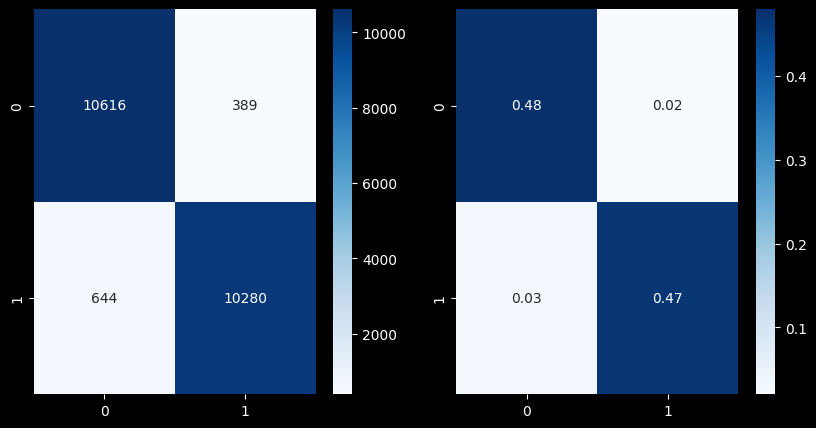

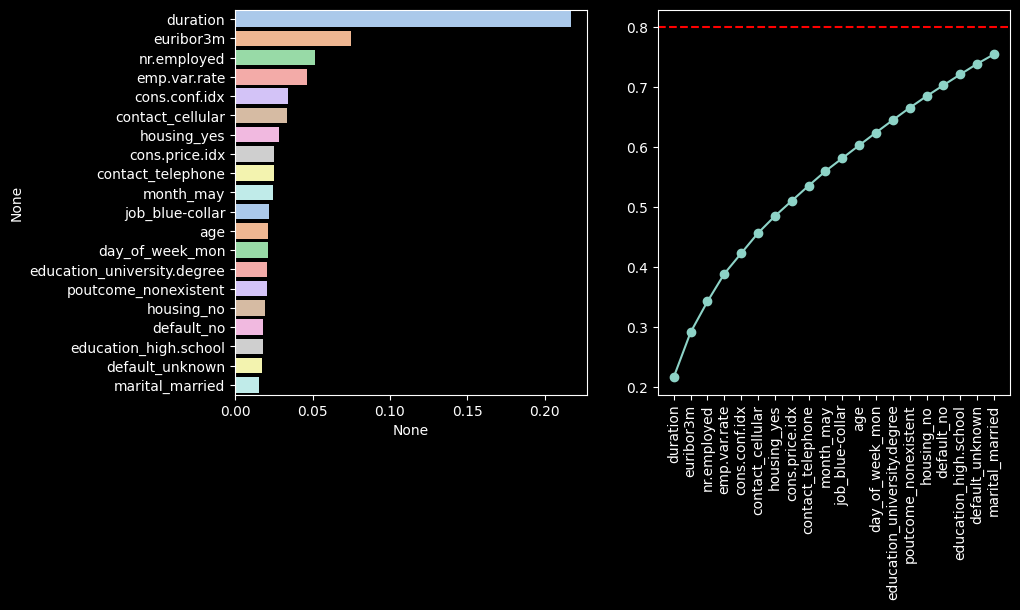

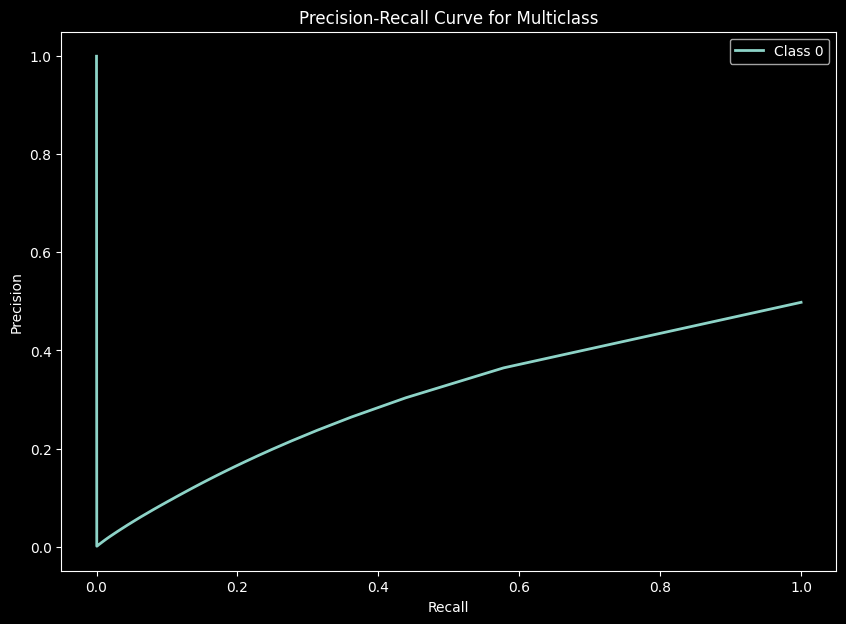

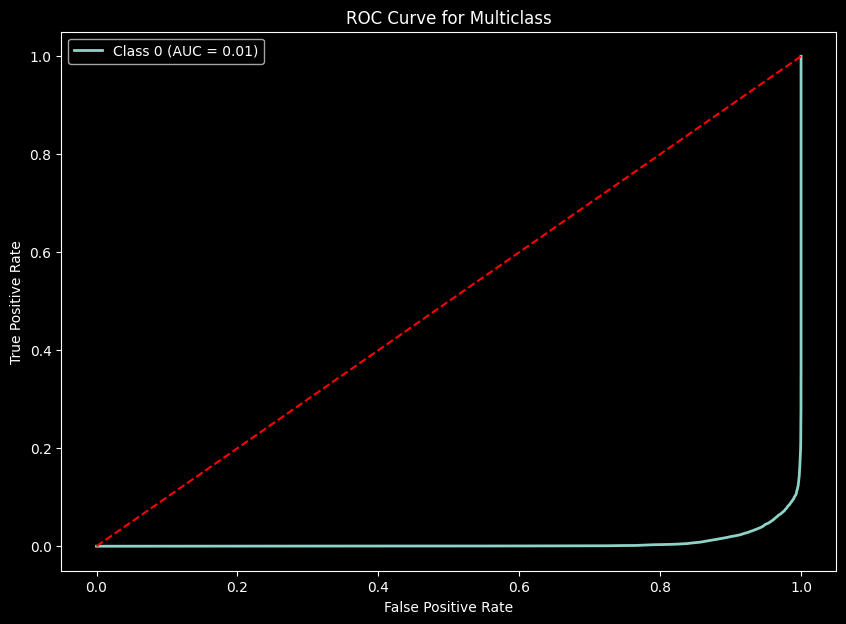

Error: y should be a 1d array, got an array of shape (21929, 2) instead.


In [49]:
Solution(rfc).model_check(x_train, y_train, x_test, y_test)

In [ ]:
model_result

In [ ]:
xgb_c = xgb.XGBClassifier()
Solution(xgb_c).model_check(x_train, y_train, x_test, y_test)

In [ ]:
lgb_c = lgb.LGBMClassifier()
Solution(lgb_c).model_check(x_train, y_train, x_test, y_test)

In [ ]:
Solution(knn_c).model_check(x_train, y_train, x_test, y_test)

In [ ]:
svb_c = SVC()
Solution(svb_c).model_check(x_train, y_train, x_test, y_test)

In [ ]:
logis_r = LogisticRegression()
Solution(logis_r).model_check(x_train, y_train, x_test, y_test)

In [ ]:
model_result = pd.DataFrame(model_result)

In [ ]:
model_result

In [ ]:
model_result.sort_values(by='precision', ascending=False)